### CO2 emissions dataset

In [9]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'data/CO2emissions.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Now, 'df' contains your data from the CSV file
display(df)

# number of years in dataframe
unique_years = len(df['Year'].unique())
print(f"Total of unique years: {unique_years}, Period: {min(df['Year'].unique())} - {max(df['Year'].unique())}" )

# number of countries (including Global)
unique_countries = len(df['ISO 3166-1 alpha-3'].unique())
print(f"Total countries:{unique_countries}")

# check if all countries have all years
print("All countries have all years:",all(num == unique_years for num in df['ISO 3166-1 alpha-3'].value_counts().values))

# check if Total column contains missing values
print("'total' column has missing values:", all(num == True for num in df['Total'].isna().values))

# check if Total column contains zero values
print("'Total' column contains values=0:",True if len(df[df['Total']==0]) > 0 else False)
print(len(df[df['Total']==0]))

df_CO2 = df.copy()


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other
0,Afghanistan,AFG,1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,4.749682,1.908857,1.610910,0.940144,0.198416,0.051579,0.039776
63100,Global,WLD,2018,4.792753,1.919213,1.596350,0.979965,0.204225,0.053634,0.039366
63101,Global,WLD,2019,4.775633,1.896468,1.589920,0.984878,0.208309,0.056569,0.039490
63102,Global,WLD,2020,4.497423,1.807760,1.427353,0.963695,0.208844,0.051981,0.037789


Total of unique years: 272, Period: 1750 - 2021
Total countries:226
All countries have all years: False
'total' column has missing values: False
'Total' column contains values=0: True
1878


### UN-speeches dataset -> overview csv

In [10]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'data/Speakers_by_session.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, sep=';')

# Now, 'df' contains your data from the CSV file
display(df)

unique_years = len(df['Year'].unique())
print(f"Total of unique years: {unique_years}, Period: {min(df['Year'].unique())} - {max(df['Year'].unique())}" )

# number of countries (including Global)
unique_countries = len(df['ISO Code'].unique())
print(f"Total countries:{unique_countries}")

# check if all countries have all years
print("All countries have all years:",all(num == unique_years for num in df['ISO Code'].value_counts().values))

,Year,Session,ISO Code,Country,Name of Person Speaking,Post,Unnamed: 6
0,2022,77,BRA,Brazil,Jair Bolsonaro,President,NaN
1,2022,77,SEN,Senegal,Macky Sail,President,NaN
2,2022,77,CHL,Chile,Gabriel Boric Font,President,NaN
3,2022,77,JOR,Jordan,Abdullah II ibn Al Hussein,King,NaN
4,2022,77,COL,Colombia,Gustavo Petro Urrego,President,NaN
...,...,...,...,...,...,...,...
10554,1946,1,USA,United States of America,Mr. Austin,NaN,NaN
10555,1946,1,IRN,Iran,Mr. Entezam,NaN,NaN
10556,1946,1,URY,Uruguay,Mr. Blanco,NaN,NaN
10557,1946,1,LUX,Luxembourg,Mr. Bech,NaN,NaN


Total of unique years: 77, Period: 1946 - 2022
Total countries:213
All countries have all years: False


### Merge CO2 emission datset with UN speeches dataset

In [11]:
# rename ISO code column to be able to merge
df_CO2 = df_CO2.rename(columns={'ISO 3166-1 alpha-3': 'ISO Code'})

# merge CO2 dataset with UN speeches on year and ISO Code of countries
df_merged = pd.merge(df, df_CO2, on=['Year', 'ISO Code'], how='inner')
display(df_merged)

# number of year and range
unique_years = len(df_merged['Year'].unique())
print(f"Total of unique years: {unique_years}, Period: {min(df_merged['Year'].unique())} - {max(df_merged['Year'].unique())}" )

# number of countries (including Global)
unique_countries = len(df_merged['ISO Code'].unique())
print(f"Total countries:{unique_countries}")

# check if all countries have all years
print("All countries have all years:",all(num == unique_years for num in df_merged['ISO Code'].value_counts().values))

# check for missing values
missing = [i for i in df_merged['Total'].isna().values if i== True]
display(df_merged[df_merged['Total'].isna()])
print(df_merged[df_merged['Total'].isna()]['Year'].values)
print("'total' column has missing values: ", len(missing))



,Year,Session,ISO Code,Country_x,Name of Person Speaking,Post,Unnamed: 6,Country_y,Total,Coal,Oil,Gas,Cement,Flaring,Other
0,2021,76,BRA,Brazil,Jair Bolsonaro,President,NaN,Brazil,2.281014,0.318346,1.385677,0.354480,0.111013,0.081675,0.029824
1,2021,76,USA,United States,Joe Biden,President,NaN,USA,14.858668,2.974205,6.628469,4.857715,0.122265,0.200845,0.075169
2,2021,76,MDV,Maldives,Ibrahim Mohamed Solih,President,NaN,Maldives,4.062030,0.000000,4.062030,0.000000,0.000000,0.000000,NaN
3,2021,76,COL,Colombia,Iván Duque Márquez,President,NaN,Colombia,1.780076,0.233234,0.969493,0.451441,0.113956,0.011953,NaN
4,2021,76,QAT,Qatar,Tamim bin Hamad Al Thani,Amir,NaN,Qatar,35.587357,0.000000,3.226295,31.072901,0.584650,0.703512,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10163,1946,1,USA,United States of America,Mr. Austin,NaN,NaN,USA,15.904564,9.150051,5.192465,1.430909,0.103234,0.000000,0.027905
10164,1946,1,IRN,Iran,Mr. Entezam,NaN,NaN,Iran,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10165,1946,1,URY,Uruguay,Mr. Blanco,NaN,NaN,Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10166,1946,1,LUX,Luxembourg,Mr. Bech,NaN,NaN,Luxembourg,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Total of unique years: 76, Period: 1946 - 2021
Total countries:193
All countries have all years: False


,Year,Session,ISO Code,Country_x,Name of Person Speaking,Post,Unnamed: 6,Country_y,Total,Coal,Oil,Gas,Cement,Flaring,Other
135,2021,76,KNA,Saint Kitts and Nevis,Timothy Harris,Prime Minister,NaN,St. Kitts-Nevis-Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,2020,75,KNA,Saint Kitts and Nevis,Mr. Timothy S. Harris,Prime Minister and Minister for Sustainable De...,NaN,St. Kitts-Nevis-Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,2019,74,KNA,Saint Kitts and Nevis,Mr. Timothy S. Harris,Prime Minister and Minister for Sustainable De...,NaN,St. Kitts-Nevis-Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,2018,73,KNA,Saint Kitts and Nevis,Mr. Timothy S. Harris,Prime Minister and Minister for Sustainable De...,NaN,St. Kitts-Nevis-Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN
945,2017,72,KNA,Saint Kitts and Nevis,Mr. Mark Anthony Brantley,Minister for Foreign Affairs and Aviation,NaN,St. Kitts-Nevis-Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,1946,1,LBN,Lebanon,Mr. Chamoun,NaN,NaN,Lebanon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10164,1946,1,IRN,Iran,Mr. Entezam,NaN,NaN,Iran,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10165,1946,1,URY,Uruguay,Mr. Blanco,NaN,NaN,Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10166,1946,1,LUX,Luxembourg,Mr. Bech,NaN,NaN,Luxembourg,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008
 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995 1994
 1993 1992 1991 1990 1989 1988 1987 1987 1987 1987 1987 1987 1987 1985
 1949 1949 1949 1949 1949 1949 1949 1949 1949 1949 1949 1949 1949 1949
 1949 1949 1949 1949 1949 1949 1949 1949 1949 1949 1948 1948 1948 1948
 1948 1948 1948 1948 1948 1948 1948 1948 1948 1948 1948 1948 1948 1948
 1948 1948 1948 1948 1948 1948 1948 1948 1947 1947 1947 1947 1947 1947
 1947 1947 1947 1947 1947 1947 1947 1947 1947 1947 1947 1947 1947 1947
 1947 1947 1947 1947 1947 1947 1947 1946 1946 1946 1946 1946 1946 1946
 1946 1946 1946 1946 1946 1946 1946 1946 1946 1946 1946 1946 1946 1946
 1946 1946 1946 1946 1946]
'total' column has missing values:  145


### Descriptives of merged dataset (CO2 & UN speeches)

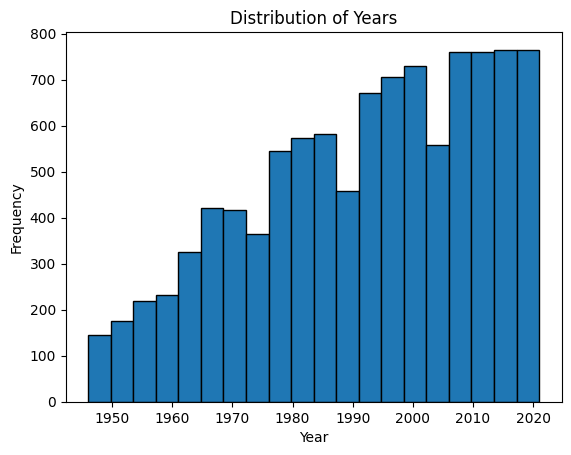

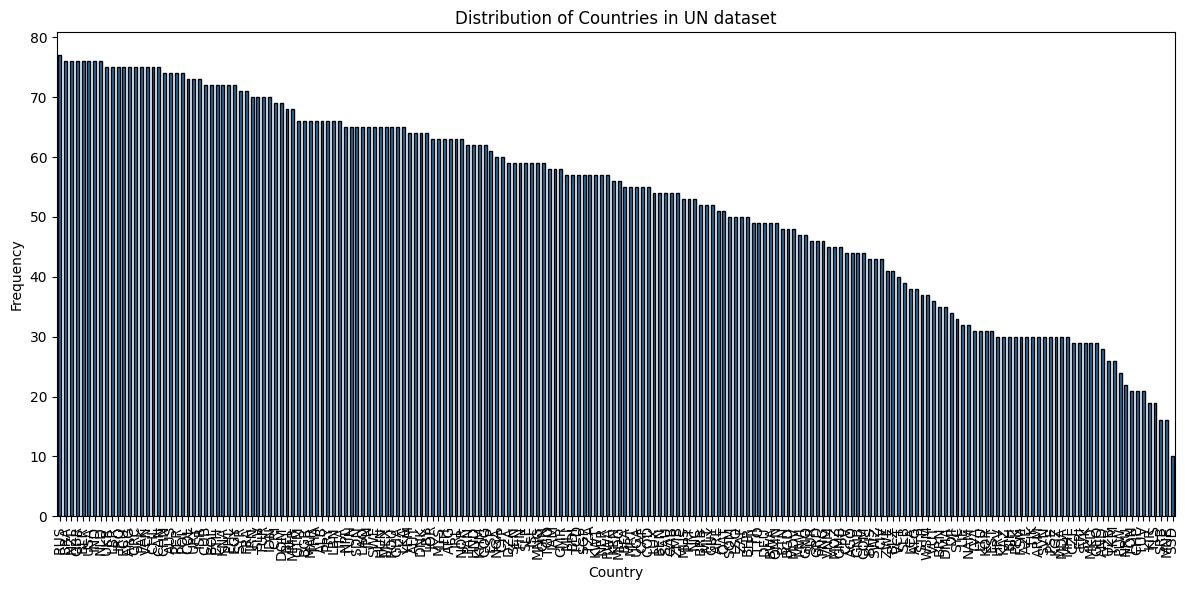

Descriptives about number of speeches per country
Minimum Count: 10
Maximum Count: 77
Mean Count: 52.93
Median Count: 56.0
Mode Count: 30


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(df_merged['Year'], bins=20, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years')
plt.show()

country_counts = df_merged['ISO Code'].value_counts()

# Plot the distribution of countries as a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
country_counts.plot(kind='bar', edgecolor='k')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Distribution of Countries in UN dataset')
plt.tight_layout()  # Ensures the labels fit properly
plt.show()

import statistics
country_counts = df_merged['ISO Code'].value_counts()
min_count = country_counts.min()
max_count = country_counts.max()
mean_count = round(country_counts.mean(),2)
median_count = country_counts.median()
mode_count = statistics.mode(country_counts)

# Print the calculated statistics
print("Descriptives about number of speeches per country")
print(f"Minimum Count: {min_count}")
print(f"Maximum Count: {max_count}")
print(f"Mean Count: {mean_count}")
print(f"Median Count: {median_count}")
print(f"Mode Count: {mode_count}")


In [14]:
df_short = df_merged[df_merged['Year']==2021].head()
display(df_short)

,Year,Session,ISO Code,Country_x,Name of Person Speaking,Post,Unnamed: 6,Country_y,Total,Coal,Oil,Gas,Cement,Flaring,Other
0,2021,76,BRA,Brazil,Jair Bolsonaro,President,NaN,Brazil,2.281014,0.318346,1.385677,0.354480,0.111013,0.081675,0.029824
1,2021,76,USA,United States,Joe Biden,President,NaN,USA,14.858668,2.974205,6.628469,4.857715,0.122265,0.200845,0.075169
2,2021,76,MDV,Maldives,Ibrahim Mohamed Solih,President,NaN,Maldives,4.062030,0.000000,4.062030,0.000000,0.000000,0.000000,NaN
3,2021,76,COL,Colombia,Iván Duque Márquez,President,NaN,Colombia,1.780076,0.233234,0.969493,0.451441,0.113956,0.011953,NaN
4,2021,76,QAT,Qatar,Tamim bin Hamad Al Thani,Amir,NaN,Qatar,35.587357,0.000000,3.226295,31.072901,0.584650,0.703512,NaN


In [27]:
import numpy as np
def add_text_to_df(df):
    df['txt'] = np.nan

    # using list because of warning, when processing a large dataframe, use loc
    speech_text = []
    for index, row in df.iterrows():
        text_path = f"data/Session {row['Session']} - {row['Year']}/{row['ISO Code']}_{row['Session']}_{row['Year']}.txt"
        with open(text_path, "r", encoding="utf-8") as file:
            # Read the entire contents of the file into a string
            text_content = file.read()

        speech_text.append(text_content)

        # This line gives a warning but does work, use for large amount of rows
        # df.loc[(df['Year']==row['Year']) & (df['ISO Code']==row['ISO Code']),'speech_text']=text_content
    df['txt']=speech_text
    return df


df_short_text = add_text_to_df(df_short)
display(df_short_text)

FileNotFoundError: [Errno 2] No such file or directory: 'data/UNGCD_1946-2022/TXT/Session 76 - 2021/BRA_76_2021.txt'

In [16]:
co2_emission_tokens = [
    "CO2",
    "Carbon dioxide",
    "Greenhouse gas",
    "Emissions",
    "Carbon footprint",
    "Global warming",
    "Climate change",
    "Pollution",
    "Fossil fuels",
    "Greenhouse effect",
    "Carbon emissions",
    "Atmospheric carbon",
    "Climate crisis",
    "Carbon reduction",
    "Environmental impact",
    "Sustainability",
    "Renewable energy",
    "Carbon neutral",
    "Carbon capture",
    "Paris Agreement"
]

import nltk
from nltk.stem import PorterStemmer

# Initialize the NLTK Porter Stemmer
stemmer = PorterStemmer()

# Stem and lowercase the tokens
stemmed_tokens = [stemmer.stem(token.lower()) for token in co2_emission_tokens]

# Print the list of stemmed tokens
print(stemmed_tokens)

['co2', 'carbon dioxid', 'greenhouse ga', 'emiss', 'carbon footprint', 'global warm', 'climate chang', 'pollut', 'fossil fuel', 'greenhouse effect', 'carbon emiss', 'atmospheric carbon', 'climate crisi', 'carbon reduct', 'environmental impact', 'sustain', 'renewable energi', 'carbon neutr', 'carbon captur', 'paris agr']


In [17]:
# Function counts occurences of tokens in text and returns the sum
def get_CO2_score(tokenlist, text):
    token_counts = {token: 0 for token in tokenlist}

    # Iterate through the tokens and count their occurrences in the text
    for token in stemmed_tokens:
        # Using a case-insensitive search by converting both the token and text to lowercase
        token_counts[token] = text.lower().count(token.lower())

    return (sum(token_counts.values()))


In [26]:
# function adds CO2 score row to dataframe
def add_CO2_score_to_df(df, tokenlist):
    score_list = []
    for index, row in df.iterrows():
        score_list.append(get_CO2_score(tokenlist, row['txt']))

    df['CO2_score'] = score_list
    return df


df_score = add_CO2_score_to_df(df_short_text, stemmed_tokens)
correlation = df_score['Total'].corr(df_score['CO2_score'])
print(f"Correlation between the CO2 score of the speech and CO2 emission: {correlation}")

Correlation between the CO2 score of the speech and CO2 emission: -0.3134853300662359
